In [ ]:
from keras.optimizers import RMSprop
from keras.preprocessing.image import img_to_array, load_img, smart_resize, ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

In [ ]:
digit_labels = os.listdir("Dataset")
data = []
labels = np.array([])
for digit in digit_labels:
    digit_dir = "Dataset/" + digit
    img_list = os.listdir(digit_dir)
    labels_digit = np.repeat(digit, len(img_list))
    labels = np.concatenate([labels, labels_digit])
    digit_data = []
    for img_name in img_list:
        img_path = digit_dir + "/" + img_name
        img = load_img(img_path)
        img_array = img_to_array(img)
        if img_array.shape[0] != 100:
            img_array = smart_resize(img_array, (100, 100), interpolation='bilinear')
        digit_data.append(img_array)
    data.append(np.array(digit_data))
X = np.concatenate(data)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3)

In [ ]:
num_classes = 10

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
model_1 = Sequential()

## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=X_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        2432      
_________________________________________________________________
activation (Activation)      (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 32)        25632     
_________________________________________________________________
activation_1 (Activation)    (None, 23, 23, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3872)              0

In [ ]:
batch_size = 32

# initiate RMSprop optimizer
opt = RMSprop(learning_rate=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images
                   
datagen.fit(X_train)      # This computes any statistics that may be needed (e.g. for centering) from the training set.

    
# Fit the model on the batches generated by datagen.flow().
model_1.fit_generator(datagen.flow(X_train, y_train,
                                 batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    epochs=20,
                    validation_data=(X_test, y_test))

c:\users\wojcika5\documents\intro to dl\venv\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
45/45 [==============================] - 43s 327ms/step - loss: 2.3485 - accuracy: 0.1140 - val_loss: 2.2667 - val_accuracy: 0.2439
Epoch 2/20
45/45 [==============================] - 13s 277ms/step - loss: 2.2638 - accuracy: 0.1767 - val_loss: 2.1785 - val_accuracy: 0.1955
Epoch 3/20
45/45 [==============================] - 13s 279ms/step - loss: 2.0549 - accuracy: 0.2861 - val_loss: 1.6030 - val_accuracy: 0.5153
Epoch 4/20
45/45 [==============================] - 13s 288ms/step - loss: 1.6993 - accuracy: 0.4351 - val_loss: 1.2661 - val_accuracy: 0.5994
Epoch 5/20
45/45 [==============================] - 13s 280ms/step - loss: 1.5623 - accuracy: 0.4584 - val_loss: 0.9496 - val_accuracy: 0.7044
Epoch 6/20
45/45 [==============================] - 13s 278ms/step - loss: 1.4516 - accuracy: 0.5023 - val_loss: 0.9954 - val_accuracy: 0.7124
Epoch 7/20
45/45 [==============================] - 12s 276ms/step - loss: 1.4121 - accuracy: 0.5085 - val_loss: 0.8051 - val_accuracy: 0.7302

In [ ]:
model_2 = Sequential()

## 5x5 convolution with 2x2 stride and 32 filters
model_2.add(Conv2D(32, (5, 5), padding='same',
                 input_shape=X_train.shape[1:]))
model_2.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_2.add(Conv2D(32, (5, 5)))
model_2.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(32, (5, 5), padding='same',
                 input_shape=X_train.shape[1:]))
model_2.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_2.add(Conv2D(32, (5, 5)))
model_2.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 100, 100, 32)      2432      
_________________________________________________________________
activation_4 (Activation)    (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 32)        25632     
_________________________________________________________________
activation_5 (Activation)    (None, 96, 96, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 48, 32)       

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images
                   
datagen.fit(X_train)

batch_size = 32

# initiate RMSprop optimizer
opt = RMSprop(learning_rate=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_2.fit_generator(datagen.flow(X_train, y_train,
                                 batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    epochs=20,
                    validation_data=(X_test, y_test))

Epoch 1/20
45/45 [==============================] - 79s 2s/step - loss: 2.3652 - accuracy: 0.1131 - val_loss: 2.3020 - val_accuracy: 0.1567
Epoch 2/20
45/45 [==============================] - 74s 2s/step - loss: 2.3012 - accuracy: 0.1142 - val_loss: 2.1166 - val_accuracy: 0.3376
Epoch 3/20
45/45 [==============================] - 74s 2s/step - loss: 2.0618 - accuracy: 0.2815 - val_loss: 1.1756 - val_accuracy: 0.6672
Epoch 4/20
45/45 [==============================] - 74s 2s/step - loss: 1.5512 - accuracy: 0.4752 - val_loss: 0.9175 - val_accuracy: 0.6882
Epoch 5/20
45/45 [==============================] - 74s 2s/step - loss: 1.3615 - accuracy: 0.5573 - val_loss: 0.7669 - val_accuracy: 0.7690
Epoch 6/20
45/45 [==============================] - 74s 2s/step - loss: 1.2374 - accuracy: 0.5714 - val_loss: 0.6069 - val_accuracy: 0.8078
Epoch 7/20
45/45 [==============================] - 75s 2s/step - loss: 1.0403 - accuracy: 0.6524 - val_loss: 0.5190 - val_accuracy: 0.8481
Epoch 8/20
45/45 [==

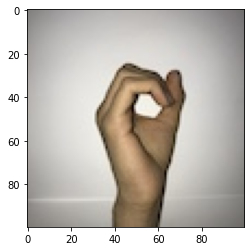

Model 1 predicted example_0.JPG as ['0'].
Model 2 predicted example_0.JPG as ['0'].


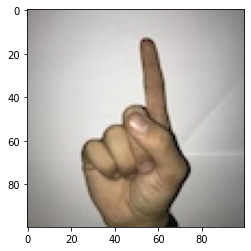

Model 1 predicted example_1.JPG as ['1'].
Model 2 predicted example_1.JPG as ['1'].


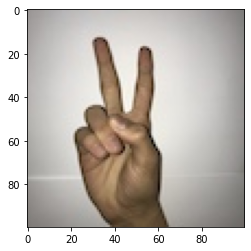

Model 1 predicted example_2.JPG as ['2'].
Model 2 predicted example_2.JPG as ['2'].


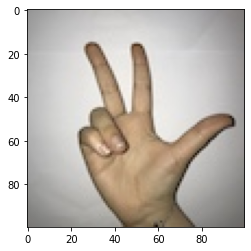

Model 1 predicted example_3.JPG as ['3'].
Model 2 predicted example_3.JPG as ['3'].


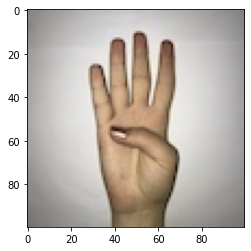

Model 1 predicted example_4.JPG as ['4'].
Model 2 predicted example_4.JPG as ['4'].


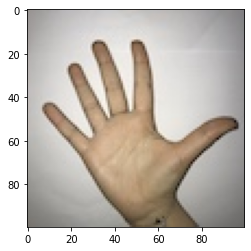

Model 1 predicted example_5.JPG as ['5'].
Model 2 predicted example_5.JPG as ['5'].


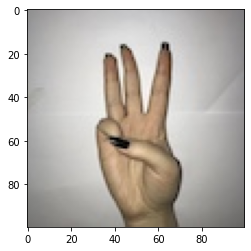

Model 1 predicted example_6.JPG as ['6'].
Model 2 predicted example_6.JPG as ['6'].


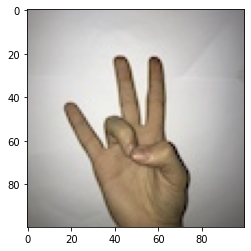

Model 1 predicted example_7.JPG as ['7'].
Model 2 predicted example_7.JPG as ['7'].


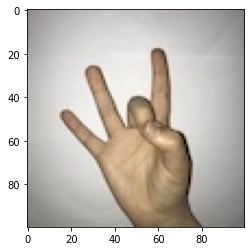

Model 1 predicted example_8.JPG as ['8'].
Model 2 predicted example_8.JPG as ['8'].


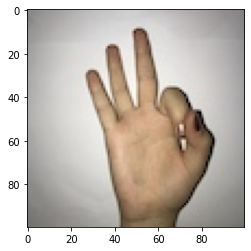

Model 1 predicted example_9.JPG as ['9'].
Model 2 predicted example_9.JPG as ['9'].


In [ ]:
#Testing on examples data
examples = os.listdir("Examples")
digit_labels_array = np.array(digit_labels)

for example in examples:
    example_path = "Examples/" + example
    example_img = load_img(example_path)
    plt.imshow(example_img)
    plt.show()
    img_array = img_to_array(example_img)
    if img_array.shape[0] != 100:
        img_array = smart_resize(img_array, (100, 100), interpolation='bilinear')
    pred_1 = model_1.predict(np.array([img_array]))
    pred_1_bool = (pred_1 == 1)[0]
    pred_1_label = digit_labels_array[pred_1_bool]
    print(f"Model 1 predicted {example} as {pred_1_label}.")

    pred_2 = model_2.predict(np.array([img_array]))
    pred_2_bool = (pred_2 == 1)[0]
    pred_2_label = digit_labels_array[pred_2_bool]
    print(f"Model 2 predicted {example} as {pred_2_label}.")


In [ ]:
#All examples were predicted correctly by both models.